# 多変量での数式化と考察
機械学習のモデルを生成して結果精度が良かった場合そのモデルを採用できる。そこで、モデルによっては特徴量を変数として線形の式を出力でき、算出された係数から結果を与える条件が分かるようになる。しかし、この手法は非常に単純なデータで可能であり、様々な条件が絡み合うと適用できないこともある。

# ライブラリのインポート

In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import LinearSVC as SVM
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

#カテゴリ分類で作られた決定境界の直線の数式を出力

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [3]:
y_name = "category"
y = df[y_name].values
x_table = df.drop([y_name], axis=1)
x_name = x_table.columns
x = x_table.values

SVMを使用する。実際にはマージンを調整することでより正確になる

In [4]:
model = SVM()#マージンを調節するとより正確になる
model.fit(x, y)
y_pred = model.predict(x)

C:\Users\decar\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


混合行列を出力

In [5]:
df_m = pd.DataFrame(confusion_matrix(y,y_pred))
df_m

,0,1,2
0,50,0,0
1,0,47,3
2,0,2,48


精度を出力する。この時、精度に不備がある場合算出された数式はあてにならない

In [6]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [7]:
fout = model.coef_
b = model.intercept_
b = b.reshape(-1,1)
fout = np.hstack((fout,b))

クラス別分類直線を出力

In [8]:
col = list(x_name)
col.append("intercept")
df_fout = pd.DataFrame(fout)
df_fout.columns = col
df_fout

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),intercept
0,0.184239,0.451223,-0.807944,-0.450718,0.109560
1,0.051251,-0.891234,0.405167,-0.938582,1.667706
2,-0.850670,-0.986791,1.380840,1.865450,-1.709497


生データでは尺度が違うため数値の影響を加味した数式を算出(0～1に正規化することで係数の大きい項目が影響力の強い項目と分かる)

In [9]:
x = minmax_scale(x)
model.fit(x, y)
y_pred = model.predict(x)

In [10]:
df_m = pd.DataFrame(confusion_matrix(y, y_pred))
df_m

,0,1,2
0,50,0,0
1,0,45,5
2,0,3,47


In [11]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.90      0.92        50
           2       0.90      0.94      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [12]:
fout = model.coef_
b = model.intercept_
b = b.reshape(-1, 1)
fout=np.hstack((fout, b))

In [13]:
col = list(x_name)
col.append("intercept")
df_fout = pd.DataFrame(fout)
df_fout.columns = col
df_fout

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),intercept
0,-0.612048,1.319489,-1.773791,-1.685446,0.588265
1,0.101026,-2.273602,1.227489,-1.167295,0.562982
2,-0.086567,-1.064237,2.261645,3.250393,-3.168260


# 目的変数が数値である場合の数式化

In [14]:
df = pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [15]:
y_name = "PRICE"
y = df[y_name].values
x_table = df.drop([y_name],axis=1)
x_name = x_table.columns
x = x_table.values

精度の算出(最も直感的な値として絶対誤差を使用)

In [16]:
model = LR()
model.fit(x, y)
y_pred = model.predict(x)
print(mean_absolute_error(y, y_pred))

3.270862810900317


相関係数で精度の確認と外れ値などの確認のため散布図を出力

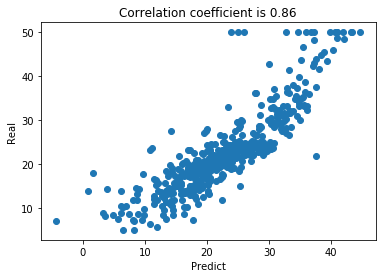

In [17]:
pr = np.array([y_pred, y])
plt.scatter(y_pred, y)
plt.title("Correlation coefficient is %.2f"%(np.corrcoef(pr)[0][1]))
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

数式を作成

In [18]:
fout = model.coef_
b = model.intercept_
fout = np.hstack((fout,b))

# 変数の影響度合いの算出
各変数のt値を算出することでp値を算出できる。p値が小さいほど変数の信用度が高くなる。

In [19]:
sse = np.sum((y - y_pred) ** 2, axis=0)
sse = sse / (x.shape[0] - x.shape[1] - 1)
s = np.linalg.inv(np.dot(x.T, x))
std_err = np.sqrt(np.diagonal(sse*s))
t = model.coef_ / std_err
p = stats.t(len(y)-1+len(x_name)+1-1).pdf(t)
dat=[fout, std_err, t, p]

In [20]:
df_fout = pd.DataFrame(dat)
col = list(x_name)
col.append("intercept")
ind = ["fout", "std_err", "t-value", "p-value"]
df_fout.columns = col
df_fout.index = ind
df_fout

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,intercept
fout,-0.108011,0.046420,0.020559,2.686734,-1.776661e+01,3.809865e+00,0.000692,-1.475567e+00,0.306049,-0.012335,-9.527472e-01,0.009312,-5.247584e-01,36.459488
std_err,0.032797,0.013724,0.061399,0.861262,3.200249e+00,2.945232e-01,0.013163,1.863993e-01,0.063603,0.003738,1.046851e-01,0.002569,4.838985e-02,NaN
t-value,-3.293348,3.382502,0.334836,3.119533,-5.551634e+00,1.293571e+01,0.052590,-7.916161e+00,4.811897,-3.299806,-9.101082e+00,3.624213,-1.084439e+01,NaN
p-value,0.001842,0.001376,0.376973,0.003185,1.222011e-07,1.129490e-32,0.398198,5.375892e-14,0.000005,0.001804,7.643433e-18,0.000601,3.490745e-24,NaN


# 切片を含めてt値とp値を算出

In [21]:
fout

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

In [22]:
tmp_data = np.zeros((len(x), 1))
tmp_data = tmp_data + 1
tmp_x = np.hstack((x, tmp_data))

In [23]:
y_pred2 = np.dot(tmp_x, fout)
print(mean_absolute_error(y, y_pred2))

3.270862810900317


In [24]:
sse = np.sum((y - y_pred2) ** 2, axis=0)
sse = sse / (tmp_x.shape[0] - tmp_x.shape[1] - 1)
s = np.linalg.inv(np.dot(tmp_x.T, tmp_x))
std_err = np.sqrt(np.diagonal(sse*s))
t = fout / std_err
p = stats.t(len(y)-1+len(fout)+1-1).pdf(t)
dat=[fout, std_err, t, p]

In [25]:
df_fout = pd.DataFrame(dat)
col = list(x_name)
col.append("intercept")
ind = ["fout", "std_err", "t-value", "p-value"]
df_fout.columns = col
df_fout.index = ind
df_fout

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,intercept
fout,-0.108011,0.046420,0.020559,2.686734,-17.766611,3.809865e+00,0.000692,-1.475567e+00,0.306049,-0.012335,-9.527472e-01,0.009312,-5.247584e-01,3.645949e+01
std_err,0.032898,0.013741,0.061558,0.862457,3.823631,4.183506e-01,0.013223,1.996577e-01,0.066414,0.003764,1.309599e-01,0.002689,5.076690e-02,5.108653e+00
t-value,-3.283175,3.378138,0.333970,3.115210,-4.646528,9.106871e+00,0.052349,-7.390481e+00,4.608209,-3.276674,-7.275106e+00,3.463268,-1.033663e+01,7.136810e+00
p-value,0.001903,0.001396,0.377083,0.003227,0.000010,7.266073e-18,0.398203,2.004721e-12,0.000012,0.001944,4.321409e-12,0.001049,2.902029e-22,1.071062e-11
